In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
with open('./src/train.csv') as f:
    train = pd.read_csv(f)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [34]:
train.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [35]:
train.head(5)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [36]:
# train.astype?
for col in ['preferred_difficulty_level', 'subscription_type', 'payment_pattern', 'target']:
    train[col] = train[col].astype('category')

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   user_id                            10000 non-null  object  
 1   subscription_duration              10000 non-null  int64   
 2   recent_login_time                  10000 non-null  int64   
 3   average_login_time                 10000 non-null  float64 
 4   average_time_per_learning_session  10000 non-null  float64 
 5   monthly_active_learning_days       10000 non-null  int64   
 6   total_completed_courses            10000 non-null  int64   
 7   recent_learning_achievement        10000 non-null  float64 
 8   abandoned_learning_sessions        10000 non-null  int64   
 9   community_engagement_level         10000 non-null  int64   
 10  preferred_difficulty_level         10000 non-null  category
 11  subscription_type                  10000 n

In [38]:
train = train.drop(columns= 'user_id')


In [39]:
cols = train.columns
cols

Index(['subscription_duration', 'recent_login_time', 'average_login_time',
       'average_time_per_learning_session', 'monthly_active_learning_days',
       'total_completed_courses', 'recent_learning_achievement',
       'abandoned_learning_sessions', 'community_engagement_level',
       'preferred_difficulty_level', 'subscription_type',
       'customer_inquiry_history', 'payment_pattern', 'target'],
      dtype='object')

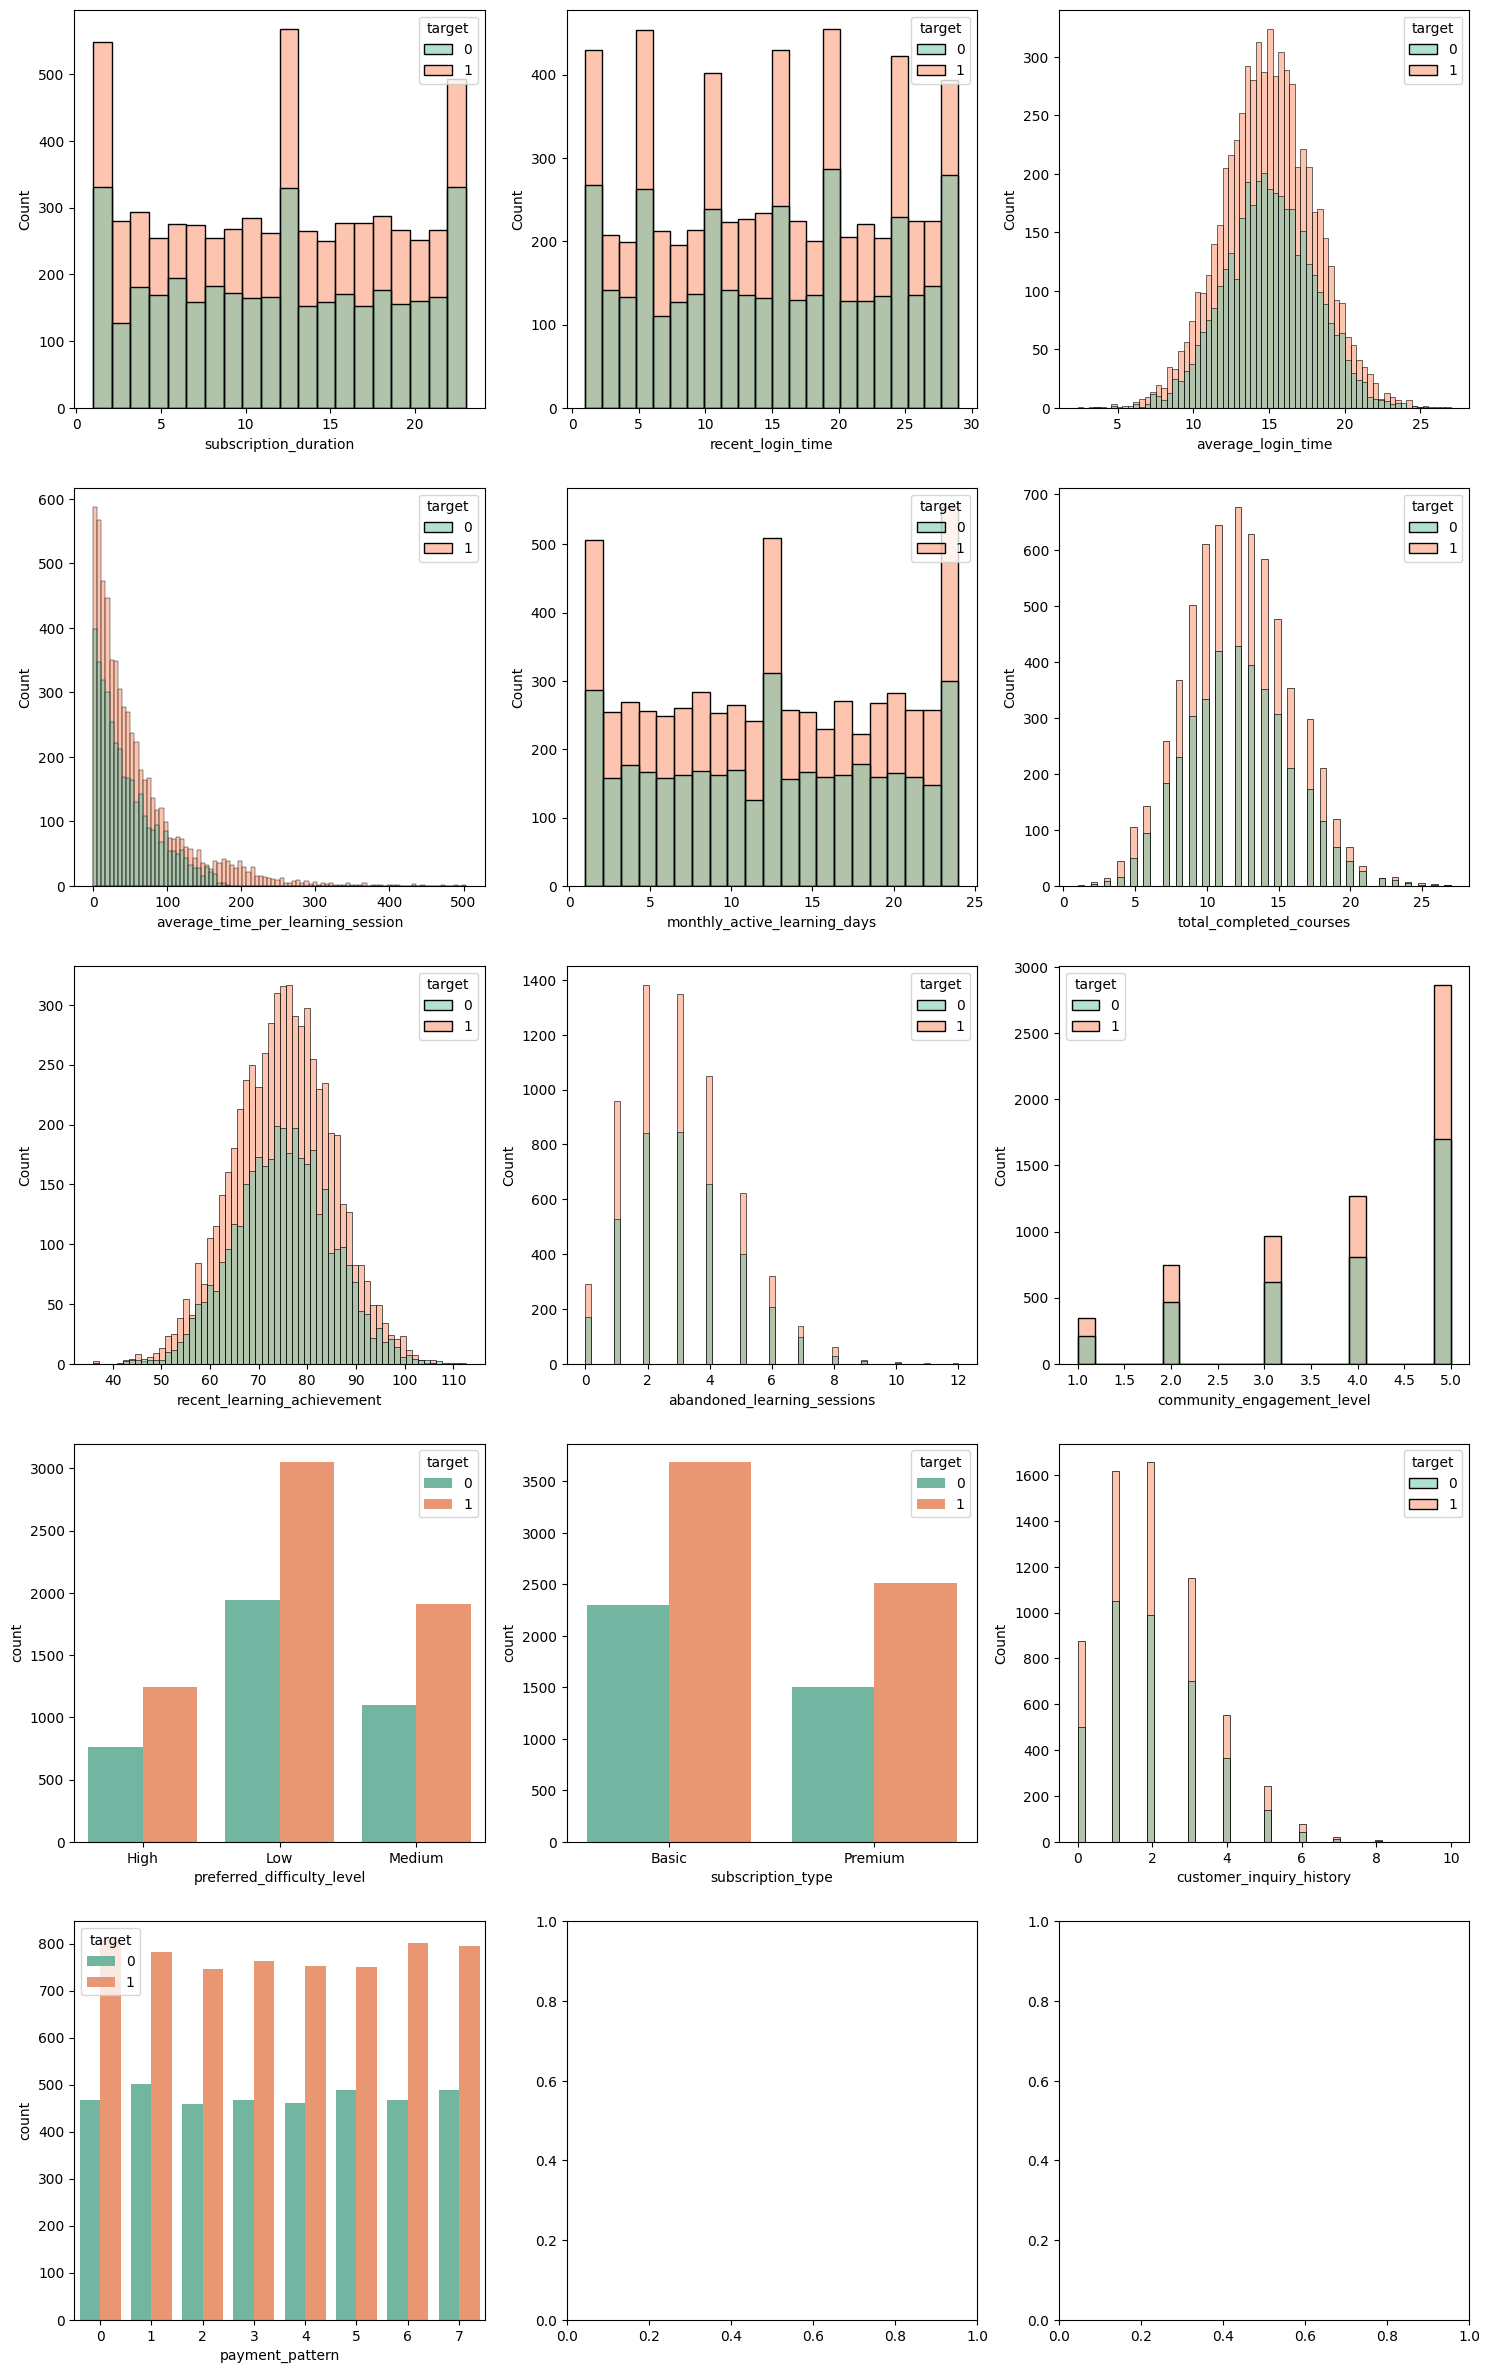

In [47]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (18, 30))
for idx, v in enumerate(list(cols)):
    if v == 'target':
        continue

    if train[v].dtype == 'category':
        sns.countplot(data = train, x = v, hue = 'target', palette = 'Set2', ax = ax[idx//3][idx%3])
    else:
        sns.histplot(data = train, x = v, hue = 'target', palette = 'Set2', ax = ax[idx//3][idx%3])

<Axes: >

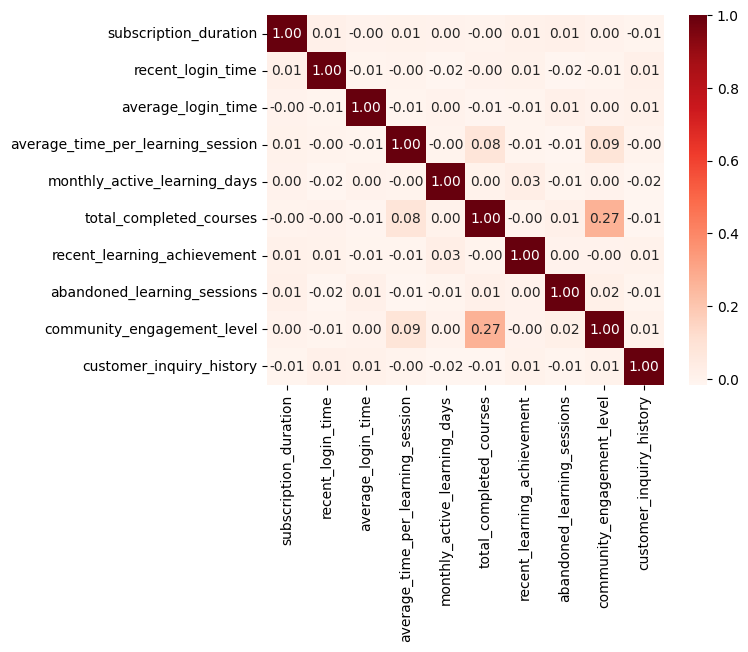

In [57]:
sns.heatmap(train.corr(numeric_only=True), annot = True, fmt = '.2f', cmap = 'Reds')